<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/FitMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fit Model**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [7]:
# Load the Fashion-MNIST dataset

data = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images , test_labels) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
#defind the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [12]:
print (train_labels[0])

9


In [13]:
#rescale the images so that they lie on between 0 and 1

train_images = train_images / 255
test_images = test_images / 255

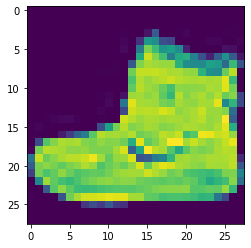

label : Ankle boot


In [15]:
import matplotlib.pyplot as plt

#display one of the images

i = 0
img = train_images [i , : , :]
plt.imshow(img)
plt.show()
print (f'label : {labels[train_labels[i] ] }')

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Build the model

model = Sequential ( [
                      Conv2D (16, (3,3), activation = 'relu' , input_shape = (28,28,1)) ,
                      MaxPooling2D ((3,3) ) ,
                      Flatten () ,
                      Dense (10, activation ='softmax')
])

model.compile (optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), 
               loss = 'sparse_categorical_crossentropy' , 
               metrics = [tf.keras.metrics.SparseCategoricalAccuracy() , tf.keras.metrics.MeanAbsoluteError()])

print (model.optimizer)
print (model.loss)
print (model.metrics)

sparse_categorical_crossentropy
[]


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Fit the model
#ERROR Full shape received: (None, 28, 28)
#model.fit (train_images, train_labels , epochs= 1 , batch_size= 256)
import numpy as np
#solution
history = model.fit(train_images[...,np.newaxis], train_labels , epochs= 10 , batch_size= 256)

Epoch 1/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2478 - sparse_categorical_accuracy: 0.9092 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2462 - sparse_categorical_accuracy: 0.9099 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2450 - sparse_categorical_accuracy: 0.9096 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2429 - sparse_categorical_accuracy: 0.9113 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2431 - sparse_categorical_accuracy: 0.9107 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2412 - sparse_categorical_accuracy: 0.9110 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2404 - sparse_ca

In [38]:
#Load the history into a dataframe
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.247825,0.909183,4.420000
1,0.246248,0.909933,4.420000
2,0.244956,0.909583,4.420001
3,0.242913,0.911283,4.420001
4,0.243071,0.910700,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

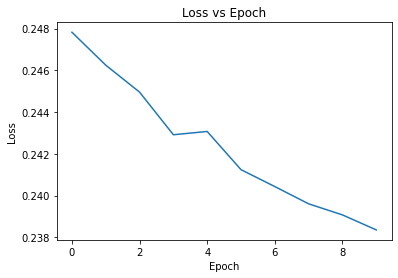

In [39]:
#Make a plot for loss function

loss_plot = df.plot (y= 'loss' , title = 'Loss vs Epoch' , legend = False)
loss_plot.set (xlabel = 'Epoch' , ylabel = 'Loss')